In [21]:
'''
PROJECT OVERVIEW :
As a part of the 5th sem project for NN and DL class . We have made this Currency Denomination Detection project where we have defined the model completely from scratch .

MODEL SELECTION :
Custom made Residual Convolutional Neural Network from Scratch using numpy .

REASONS :
We use ResNet here because:

It prevents vanishing gradient problems.

It allows the network to learn subtle patterns in images.

Even a small residual network (MiniResNet) is powerful enough for your 7-class currency classification task.

Skip connections make training more stable and efficient compared to a plain CNN.

MODEL DETAILS :

~ssmcjt
'''

'\nPROJECT OVERVIEW :\nAs a part of the 5th sem project for NN and DL class . We have made this Currency Denomination Detection project where we have defined the model completely from scratch .\n\nMODEL SELECTION :\nCustom made Residual Convolutional Neural Network from Scratch using numpy . \n\nREASONS :\nWe use ResNet here because:\n\nIt prevents vanishing gradient problems.\n\nIt allows the network to learn subtle patterns in images.\n\nEven a small residual network (MiniResNet) is powerful enough for your 7-class currency classification task.\n\nSkip connections make training more stable and efficient compared to a plain CNN.\n\nMODEL DETAILS : \n\n~ssmcjt\n'

**DEPENDENCIES**

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
from google.colab import drive
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("SUCCESS")

SUCCESS


**Loading files and mounting drive**

In [23]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
#changing the curr dir to the folder in drive

folder_path = '/content/drive/MyDrive/Colab Notebooks/personal/Currency Denomination Detection '
os.chdir(folder_path)
print(f"Changed directory to: {os.getcwd()}")

Changed directory to: /content/drive/MyDrive/Colab Notebooks/personal/Currency Denomination Detection 


In [25]:
# List all files and directories in the current directory
contents = os.listdir('.')


for item in contents:
    print(item)

Cuurency Denomination Detection.ipynb
Test
Train


**EDA & pre processing**

In [26]:
#224x224 is safe for ResNet/MobileNet)
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Paths to your dataset in Google Drive
train_dir = "/content/drive/MyDrive/Colab Notebooks/personal/Currency Denomination Detection /Train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/personal/Currency Denomination Detection /Test"

# Data augmentation + normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # take 20% from train as validation
)

# Only rescaling for validation/test
test_datagen = ImageDataGenerator(rescale=1./255)

# Train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

# Validation generator
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False  # important for evaluation
)

# Check class mapping (folder names → label numbers)
print("Class indices:", train_generator.class_indices)


Found 125 images belonging to 7 classes.
Found 28 images belonging to 7 classes.
Found 42 images belonging to 7 classes.
Class indices: {'1Hundrednote': 0, '2Hundrednote': 1, '2Thousandnote': 2, '5Hundrednote': 3, 'Fiftynote': 4, 'Tennote': 5, 'Twentynote': 6}


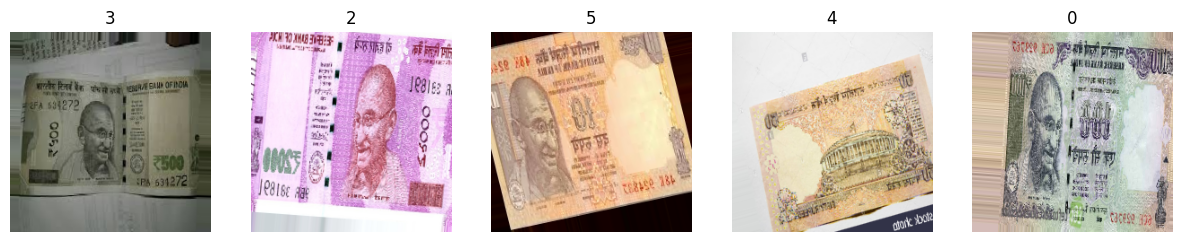

In [27]:
# Get a batch of images and labels
images, labels = next(train_generator)

# Show first 5 images
plt.figure(figsize=(15, 5))
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.title(np.argmax(labels[i]))  # shows class index
    plt.axis("off")
plt.show()

In [28]:
#bfore preprocessing
def count_images_per_class(base_dir):
    total_images = 0
    for cls in os.listdir(base_dir):
        cls_path = os.path.join(base_dir, cls)
        if os.path.isdir(cls_path):
            num_images = len(os.listdir(cls_path))
            print(f"{cls}: {num_images}")
            total_images += num_images
    return total_images

train_dir = "/content/drive/MyDrive/Colab Notebooks/personal/Currency Denomination Detection /Train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/personal/Currency Denomination Detection /Test"


print("BEFORE PROCESSING ")
print("🔹 Training set:")
total_train = count_images_per_class(train_dir)
print(f"Total training images: {total_train}")

print("\n🔹 Test set:")
total_test = count_images_per_class(test_dir)
print(f"Total test images: {total_test}")

BEFORE PROCESSING 
🔹 Training set:
1Hundrednote: 22
2Hundrednote: 22
2Thousandnote: 21
5Hundrednote: 22
Fiftynote: 22
Tennote: 22
Twentynote: 22
Total training images: 153

🔹 Test set:
1Hundrednote: 6
2Hundrednote: 6
2Thousandnote: 6
5Hundrednote: 6
Fiftynote: 6
Tennote: 6
Twentynote: 6
Total test images: 42


In [29]:
#after preprocessing
class_indices = train_generator.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

print(" Training set distribution:")
train_counts = np.bincount(train_generator.classes)
for i, count in enumerate(train_counts):
    print(f"{idx_to_class[i]}: {count}")

print("\n Validation set distribution:")
val_counts = np.bincount(val_generator.classes)
for i, count in enumerate(val_counts):
    print(f"{idx_to_class[i]}: {count}")

print("\n Test set distribution:")
test_counts = np.bincount(test_generator.classes)
for i, count in enumerate(test_counts):
    print(f"{idx_to_class[i]}: {count}")

print("Total training images:", train_generator.samples)
print("Total validation images:", val_generator.samples)
print("Total test images:", test_generator.samples)

 Training set distribution:
1Hundrednote: 18
2Hundrednote: 18
2Thousandnote: 17
5Hundrednote: 18
Fiftynote: 18
Tennote: 18
Twentynote: 18

 Validation set distribution:
1Hundrednote: 4
2Hundrednote: 4
2Thousandnote: 4
5Hundrednote: 4
Fiftynote: 4
Tennote: 4
Twentynote: 4

 Test set distribution:
1Hundrednote: 6
2Hundrednote: 6
2Thousandnote: 6
5Hundrednote: 6
Fiftynote: 6
Tennote: 6
Twentynote: 6
Total training images: 125
Total validation images: 28
Total test images: 42


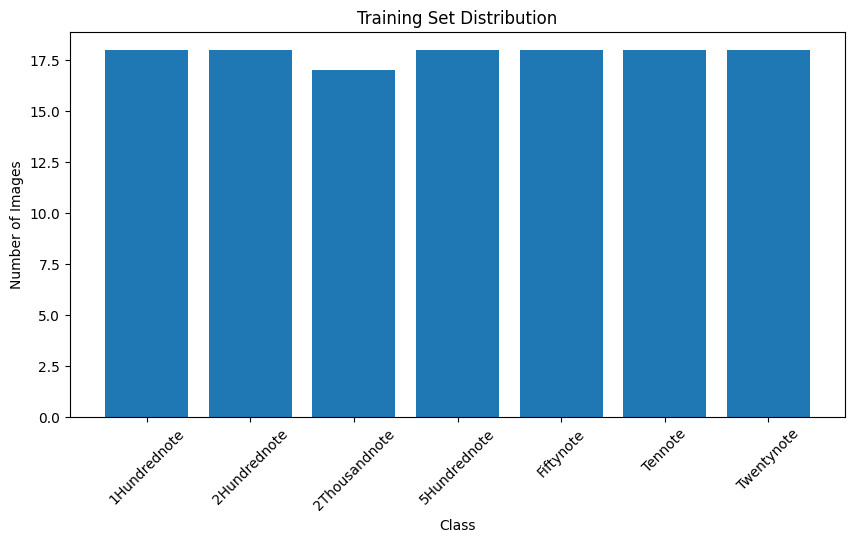

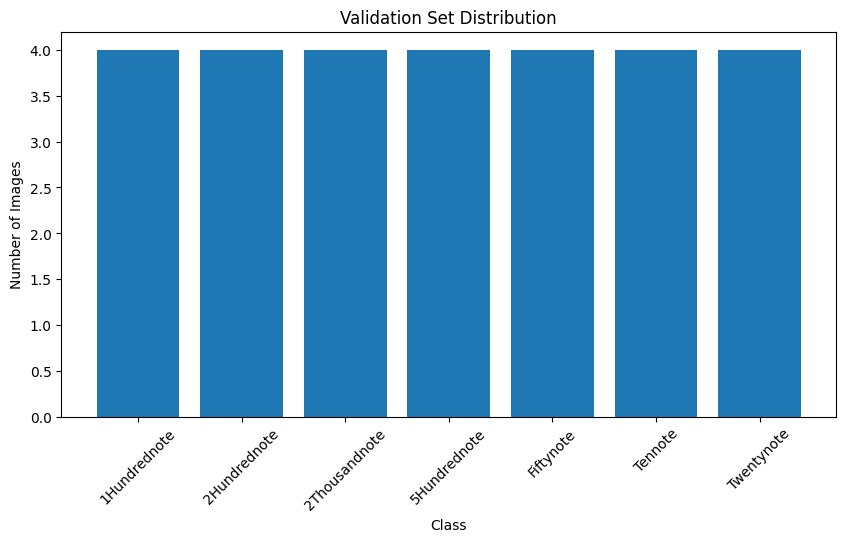

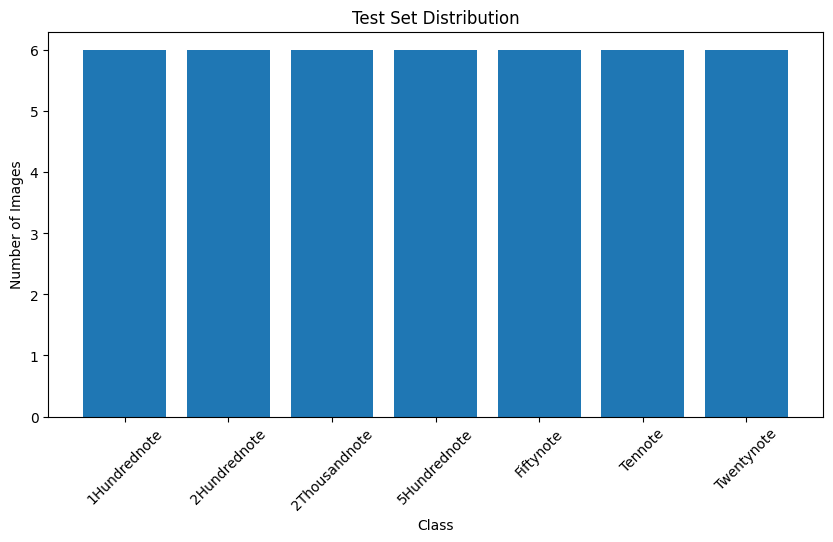

In [30]:
#visualizing class balance or imbalance
def plot_distribution(generator, title):
    class_indices = generator.class_indices
    idx_to_class = {v: k for k, v in class_indices.items()}

    counts = np.bincount(generator.classes)

    plt.figure(figsize=(10,5))
    plt.bar(idx_to_class.values(), counts)
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45)
    plt.show()

# Plot distributions
plot_distribution(train_generator, "Training Set Distribution")
plot_distribution(val_generator, "Validation Set Distribution")
plot_distribution(test_generator, "Test Set Distribution")


**MODEL TRAINING**

In [31]:
'''
UTILITY FUNCTIONS
'''
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def cross_entropy_loss(y_pred, y_true):
    loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / y_pred.shape[0]
    return loss

def accuracy(y_pred, y_true):
    pred_classes = np.argmax(y_pred, axis=1)
    true_classes = np.argmax(y_true, axis=1)
    return np.mean(pred_classes == true_classes)

def evaluate(model, generator, steps=10):
    total_loss, total_acc, count = 0, 0, 0
    for i, (x_batch, y_batch) in enumerate(generator):
        y_pred = model.forward(x_batch)
        total_loss += cross_entropy_loss(y_pred, y_batch)
        total_acc += accuracy(y_pred, y_batch)
        count += 1
        if i >= steps:
            break
    return total_loss / count, total_acc / count


In [32]:
'''
LAYER IMPLEMENTATIONS
'''
class Conv2D:
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        self.stride = stride
        self.padding = padding
        self.kernels = np.random.randn(out_channels, in_channels, kernel_size, kernel_size) * 0.01
        self.biases = np.zeros((out_channels, 1))

    def forward(self, x):
        # x shape: (batch, in_channels, H, W)
        self.input = x
        batch_size, in_channels, H, W = x.shape
        out_channels, _, k, _ = self.kernels.shape

        # Apply padding
        if self.padding > 0:
            x_padded = np.pad(
                x,
                ((0,0), (0,0), (self.padding,self.padding), (self.padding,self.padding)),
                mode='constant'
            )
        else:
            x_padded = x

        H_out = (H - k + 2 * self.padding) // self.stride + 1
        W_out = (W - k + 2 * self.padding) // self.stride + 1
        out = np.zeros((batch_size, out_channels, H_out, W_out))

        for b in range(batch_size):
            for oc in range(out_channels):
                for i in range(0, H_out):
                    for j in range(0, W_out):
                        h_start, w_start = i * self.stride, j * self.stride
                        region = x_padded[b, :, h_start:h_start+k, w_start:w_start+k]
                        out[b, oc, i, j] = np.sum(region * self.kernels[oc]) + self.biases[oc]

        self.output = out
        return out

    def backward(self, dout, lr):
        # TODO: implement convolution backpropagation
        pass


class Flatten:
    def forward(self, x):
        self.input_shape = x.shape
        return x.reshape(x.shape[0], -1)

    def backward(self, dout, lr):
        return dout.reshape(self.input_shape)


class Dense:
    def __init__(self, in_features, out_features):
        self.weights = np.random.randn(in_features, out_features) * 0.01
        self.biases = np.zeros((1, out_features))

    def forward(self, x):
        self.input = x
        return np.dot(x, self.weights) + self.biases

    def backward(self, dout, lr):
        # TODO: implement Dense layer backpropagation
        pass


In [33]:
'''
RESIDUAL PART
'''
class ResidualBlock:
    def __init__(self, in_channels, out_channels):
        # Using padding=1 so dims are preserved
        self.conv1 = Conv2D(in_channels, out_channels, kernel_size=3, padding=1)
        self.conv2 = Conv2D(out_channels, out_channels, kernel_size=3, padding=1)

    def forward(self, x):
        out = self.conv1.forward(x)
        out = relu(out)
        out = self.conv2.forward(out)
        # Residual connection
        if x.shape == out.shape:
            out += x
        return relu(out)

    def backward(self, dout, lr):
        # TODO: implement backpropagation for residual block
        pass

In [34]:
'''
MINI RESNET MODEL
'''
class MiniResNet:
    def __init__(self, input_shape=(224, 224, 3), num_classes=7):
        self.block1 = ResidualBlock(3, 8)
        self.block2 = ResidualBlock(8, 8)

        dummy = np.zeros((1, input_shape[2], input_shape[0], input_shape[1]))  # NCHW
        out = self.block1.forward(dummy)
        out = self.block2.forward(out)
        flattened_size = np.prod(out.shape[1:])

        self.flatten = Flatten()
        self.fc = Dense(flattened_size, num_classes)

    def forward(self, x):
        if x.shape[-1] in [1, 3]:
            x = np.transpose(x, (0, 3, 1, 2))
        out = self.block1.forward(x)
        out = self.block2.forward(out)
        out = self.flatten.forward(out)
        out = self.fc.forward(out)
        return softmax(out)

    def backward(self, dout, lr, optimizer):
        """
        Chain backward pass through layers
        grads should be collected and passed to optimizer.step()
        """
        # TODO: Implement once Conv2D/Dense backward are ready
        pass

    def get_params(self):
        """
        Collect trainable params for optimizer
        """
        params = []
        # Conv kernels & biases
        for block in [self.block1, self.block2]:
            params.append(("conv1_kernels", block.conv1.kernels))
            params.append(("conv1_biases", block.conv1.biases))
            params.append(("conv2_kernels", block.conv2.kernels))
            params.append(("conv2_biases", block.conv2.biases))
        # Dense weights & biases
        params.append(("fc_weights", self.fc.weights))
        params.append(("fc_biases", self.fc.biases))
        return params


In [35]:
'''
OPTIMIZATIONS
'''
class AdamOptimizer:
    def __init__(self, params, lr=0.001, beta1=0.9, beta2=0.999, eps=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.t = 0

        self.m = {id(p): np.zeros_like(p) for _, p in params}
        self.v = {id(p): np.zeros_like(p) for _, p in params}
        self.params = params

    def step(self, grads):

        self.t += 1
        for (name, param), (_, grad) in zip(self.params, grads):
            pid = id(param)
            self.m[pid] = self.beta1 * self.m[pid] + (1 - self.beta1) * grad
            self.v[pid] = self.beta2 * self.v[pid] + (1 - self.beta2) * (grad ** 2)

            m_hat = self.m[pid] / (1 - self.beta1 ** self.t)
            v_hat = self.v[pid] / (1 - self.beta2 ** self.t)

            param -= self.lr * m_hat / (np.sqrt(v_hat) + self.eps)


In [36]:
'''
TRAINING
'''
def train_model(model, train_gen, val_gen, epochs=5, steps_per_epoch=10, val_steps=5, lr=0.001):
    optimizer = AdamOptimizer(model.get_params(), lr=lr)

    for epoch in range(epochs):
        epoch_loss, epoch_acc, count = 0, 0, 0

        # Training loop
        for i, (x_batch, y_batch) in enumerate(train_gen):
            y_pred = model.forward(x_batch)

            # Loss + accuracy
            loss = cross_entropy_loss(y_pred, y_batch)
            acc = accuracy(y_pred, y_batch)

            # Backward pass placeholder
            dout = (y_pred - y_batch) / y_batch.shape[0]  # softmax+CE derivative
            model.backward(dout, lr, optimizer)

            epoch_loss += loss
            epoch_acc += acc
            count += 1

            if i >= steps_per_epoch:
                break

        avg_loss = epoch_loss / count
        avg_acc = epoch_acc / count

        # Validation loop
        val_loss, val_acc = evaluate(model, val_gen, steps=val_steps)

        print(f"Epoch {epoch+1}/{epochs} | "
              f"Train Loss: {avg_loss:.4f}, Train Acc: {avg_acc:.4f} | "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")


**USING MODEL**

**CHECKING AND DEBUGGING**

In [40]:
'''
debugging forward prop and checking it
'''
def test_forward_pass(model, train_generator):
    """
    Test the forward pass of your MiniResNet model using train_generator data

    Args:
        model: Your MiniResNet instance
        train_generator: Your train data generator

    Returns:
        bool: True if forward pass works, False otherwise
    """
    print("🧪 Testing Forward Pass...")
    print("=" * 40)

    try:
        # Test 1: Model architecture check
        print("1. Checking model architecture...")
        print(f"   Model type: {type(model).__name__}")

        # Test 2: Real data from train_generator
        print("\n2. Testing with train_generator data...")
        images, labels = next(train_generator)
        print(f"   Input shape: {images.shape}")
        print(f"   Labels shape: {labels.shape}")

        # Forward pass
        predictions = model.forward(images)

        print(f"   Output shape: {predictions.shape}")
        print(f"   Output sums: {np.sum(predictions, axis=1)[:5]}")  # Show first 5 sums

        # Check if softmax is working (sums should be close to 1)
        sums = np.sum(predictions, axis=1)
        if np.allclose(sums, 1.0, atol=1e-6):
            print("   Softmax working correctly")
        else:
            print("   Softmax might have issues")

        # Calculate metrics
        loss = cross_entropy_loss(predictions, labels)
        acc = accuracy(predictions, labels)

        print(f"   Loss: {loss:.4f}")
        print(f"   Accuracy: {acc:.4f}")

        # Show first 5 predictions
        print("\n   First 5 predictions:")
        for i in range(min(5, len(predictions))):
            pred_class = np.argmax(predictions[i])
            true_class = np.argmax(labels[i])
            confidence = predictions[i][pred_class]
            print(f"   Sample {i+1}: Pred={pred_class}, True={true_class}, Conf={confidence:.3f}")

        print("\n" + "=" * 40)
        print(" Forward pass test PASSED!")
        print("model ready for training (once backprop is implemented)")
        return True

    except Exception as e:
        print(f"\n Forward pass test FAILED: {e}")
        print("Check your model arch")
        import traceback
        traceback.print_exc()  # This will show the full error trace
        return False

In [41]:

num_classes = 7
model = MiniResNet(input_shape=(224,224,3), num_classes=num_classes)
test_forward_pass(model, train_generator)

/tmp/ipython-input-2031121461.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[b, oc, i, j] = np.sum(region * self.kernels[oc]) + self.biases[oc]


🧪 Testing Forward Pass...
1. Checking model architecture...
   Model type: MiniResNet

2. Testing with train_generator data...
   Input shape: (32, 224, 224, 3)
   Labels shape: (32, 7)
   Output shape: (32, 7)
   Output sums: [1. 1. 1. 1. 1.]
   Softmax working correctly
   Loss: 1.9464
   Accuracy: 0.1562

   First 5 predictions:
   Sample 1: Pred=6, True=2, Conf=0.145
   Sample 2: Pred=6, True=5, Conf=0.144
   Sample 3: Pred=3, True=2, Conf=0.144
   Sample 4: Pred=6, True=2, Conf=0.144
   Sample 5: Pred=6, True=5, Conf=0.144

 Forward pass test PASSED!
model ready for training (once backprop is implemented)


True